In [3]:
import numpy as np
import matplotlib.pyplot as plt
from classes.Utils import *

# This code produces the loss plots

path = 'loss_data/'

# colors
red = np.array([255, 29, 0])/255
blue = np.array([0, 150, 236])/255
green = np.array([0, 208, 0])/255
white = np.array([255, 255, 255])/255  # for invisible curves
yellow = np.array([255, 255, 0])/255  
black = np.array([0, 0, 0])/255
purple = np.array([200, 0, 200])/255  # violet-purplish
grey = np.array([50, 50, 50])/255  # grey
yellow_grey = np.array([100, 100, 0])/255  # 
brown = np.array([200, 200, 50])/255  # brownish
colors = (green, red , black,  blue, purple, yellow, yellow_grey, brown, grey )



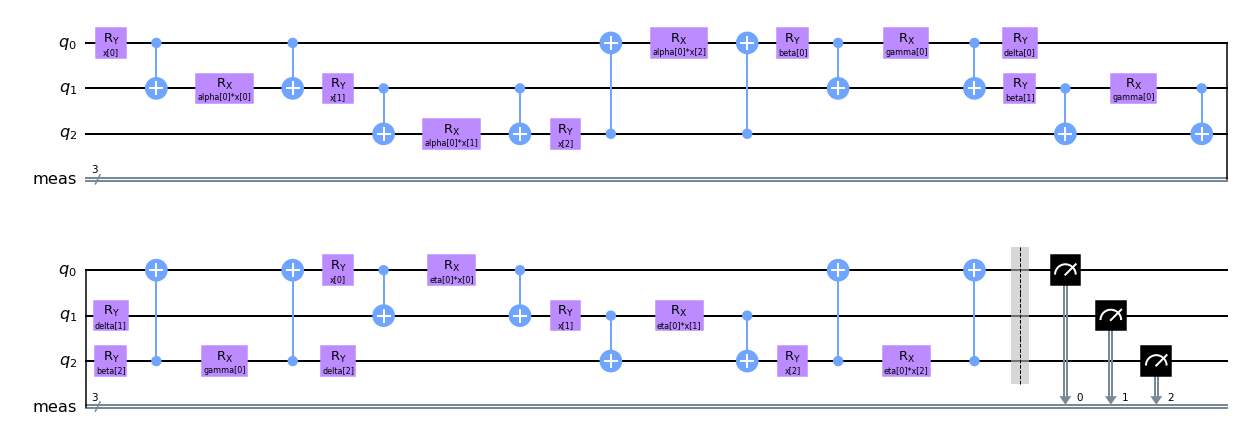

In [4]:
from qiskit.transpiler.passes import RemoveBarriers


circuit = CircuitFactory().provide("CombinedQnn", 3)
circuit = RemoveBarriers()(circuit)
circuit.measure_all()
circuit.draw(output="mpl")

# for paper appendix - remove barriers and add measurements

In [5]:

def analyse_plots(ds_name, epochs=40):
    
    isds4 = ds_name is 'generated'
    isdiabetes = ds_name is 'diabetes'

    filenames = (
                ds_name + ('__cnn_extra__bs1' if isdiabetes else '__cnn_extra__bs10'),
                # ds_name + ('__cnn_no_extra__bs1' if isdiabetes else '__cnn_no_extra__bs10'),
                ds_name + ('_ZzFeatureMapRealAmplitudeCircuit_bs1' if isdiabetes else
                           '_ZzFeatureMapRealAmplitudeCircuit_bs10'),
                ds_name + ('__hybrid_ZzFeatureMapRealAmplitudeCircuit_bs1' if isdiabetes else '__hybrid_ZzFeatureMapRealAmplitudeCircuit_bs10'),
                ds_name + ('_CombinedQnn_bs1' if isdiabetes else '_CombinedQnn_bs10'),
                ds_name + ('__hybrid_CombinedQnn_bs1' if isdiabetes else '__hybrid_CombinedQnn_bs10') 
    )
    
    
    plotnames = (
                'classical net',
                # 'shallow cnn',
                'featureVar.',
                'featureVar. + cnn',
                'combined qnn',
                'combined qnn + cnn'
    )
    
    
    # load losses    
    for i, name in enumerate(filenames):
        load_loss_and_add_to_plot(path, file=name + '_loss.npy',
                              color=colors[i], epochs=epochs, label = plotnames[i])
    
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.title(ds_name + " - loss plot")
    plt.savefig('plots/' + ds_name + 'loss.pdf', format='pdf', dpi=1000)
    plt.show()
    
    # load accuracies    
    for i, name in enumerate(filenames):
        load_loss_and_add_to_plot(path, file=name + '_accuracy.npy',
                              color=colors[i], epochs=epochs, label = plotnames[i])

        
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.title(ds_name + " - accuracy plot")
    plt.savefig('plots/' + ds_name + 'accuracy.pdf', format='pdf', dpi=1000)
    plt.show()
     
    
    


<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-5-b2a324fad1d5>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  isds4 = ds_name is 'generated'
<ipython-input-5-b2a324fad1d5>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  isdiabetes = ds_name is 'diabetes'


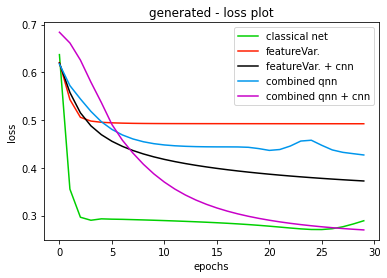

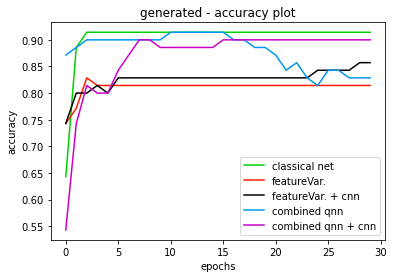

In [4]:
analyse_plots('generated', epochs=30)

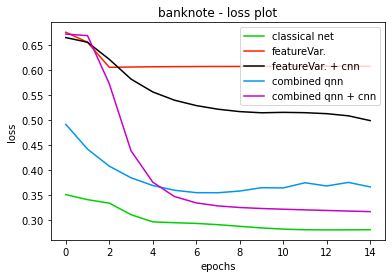

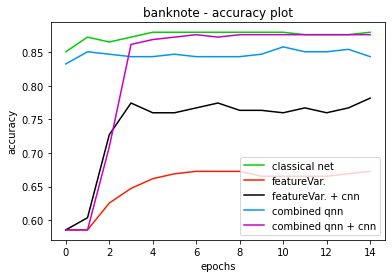

In [5]:
analyse_plots('banknote', epochs=15)


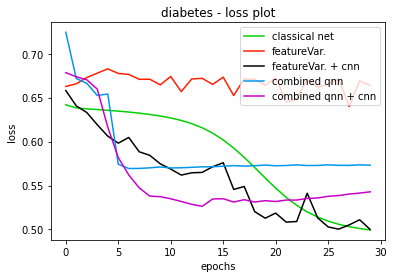

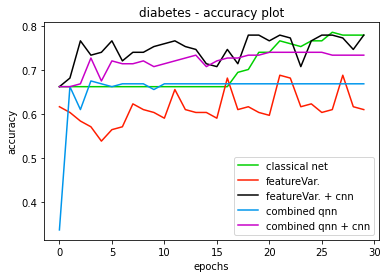

In [6]:
analyse_plots('diabetes', epochs=30)